## 序列操作

In [3]:
import nltk

In [1]:
raw ='Red lorry,yellow lorry, red lorry, yellow lorry.'

In [4]:
text =nltk.word_tokenize(raw)

In [5]:
fdist = nltk.FreqDist(text)
list(fdist)

['Red', 'lorry', ',', 'yellow', 'red', '.']

In [6]:
for key in fdist:
    print(fdist[key])

1
4
3
2
1
1


In [8]:
#zip()
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
z =zip(words,tags)
list(z)

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [10]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

### 常用於分割測試集與訓練集

In [11]:
text = nltk.corpus.nps_chat.words()

In [12]:
cut = int(0.9 * len(text))

In [13]:
training_data, test_data = text[:cut], text[cut:]

In [14]:
text == training_data + test_data

True

In [15]:
len(training_data) / len(test_data)

9.0

### n-grams

In [16]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n=3
[sent[i:i+n] for i in range(len(sent)-n+1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

In [18]:
m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array[2][5].add('Alice')
print(array)

[[set(), set(), set(), set(), set(), set(), set()], [set(), set(), set(), set(), set(), set(), set()], [set(), set(), set(), set(), set(), {'Alice'}, set()]]


## docstring

In [52]:
def accuracy(reference, test):
    '''Calculate the fraction of test items that equal the corresponding reference items.
Given a list of reference values and a corresponding list of test values,
return the fraction of corresponding values that are equal.
In particular, return the fraction of indexes
{0<i<=len(test)} such that C{test[i] == reference[i]}.
>>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
0.5
@param reference: An ordered list of reference values.
@type reference: C{list}
@param test: A list of values to compare against the corresponding
reference values.
@type test: C{list}
@rtype: C{float}
@raise ValueError: If C{reference} and C{length} do not have the
same length.'''
    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    
    for x, y in izip(reference, test):
            if x == y:
                num_correct += 1
    return float(num_correct) / len(reference)
                                

## 作為參數的函數

In [53]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the','sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

In [54]:
def extract_property(prop):
    return [prop(word) for word in sent]

In [55]:
extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [56]:
# lambda 表達式
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

## Haskell

In [59]:
def is_content_word(word):
    return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']

In [60]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the','sounds', 'will', 'take', 'care', 'of', 'themselves', '.']

In [62]:
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [64]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

## NetworkX

In [95]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn
from networkx.drawing.nx_agraph import graphviz_layout

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name) 
        traverse(graph, start, child) 

def hyponym_graph(start):
    G = nx.Graph() 
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,node_size = [16 * graph.degree(n) for n in graph],node_color = [graph.depth[n] for n in graph],with_labels = False)
    matplotlib.pyplot.show()

In [96]:
dog = wn.synset('dog.n.01')

In [97]:
graph = hyponym_graph(dog)

/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


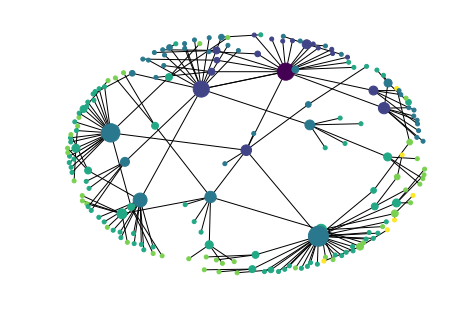

In [98]:
graph_draw(graph)

## Numpy

In [100]:
from numpy import array
cube = array([ [[0,0,0], [1,1,1], [2,2,2]],[[3,3,3], [4,4,4], [5,5,5]],[[6,6,6], [7,7,7], [8,8,8]] ])

In [101]:
cube[1,1,1]

4

In [102]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [103]:
cube[2,1:]

array([[7, 7, 7],
       [8, 8, 8]])

In [104]:
#潛在語意分析
from numpy import linalg
a=array([[4,0], [3,-5]])
u,s,vt = linalg.svd(a)
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])